In [1]:
from markov_bridges.data.lp.LP_Dataloaders import LPDataloader

In [2]:
#instance for the test set dataloader
dl = LPDataloader("test")

In [3]:
%%time
#get the dataloader
test_dataloader = dl.get_dataloader()

CPU times: user 555 ms, sys: 144 ms, total: 699 ms
Wall time: 718 ms


In [4]:
#print first batch
print(next(iter(test_dataloader)))

{'uuid': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'name': ['6STI_LigandSample-3-5Features.pdb', '6STI_LigandSample-33-3Features.pdb', '2UV7_LigandSample-33-3Features.pdb', '2UV7_LigandSample-47-3Features.pdb', '3G6H_LigandSample-1088-4Features.pdb', '3G6H_LigandSample-13147-5Features.pdb', '5U8A_LigandSample-1-4Features.pdb', '5U8A_LigandSample-6-3Features.pdb', '4KP0_LigandSample-30-3Features.pdb', '4KP0_LigandSample-32-4Features.pdb', '2BRO_LigandSample-3-3Features.pdb', '2BRO_LigandSample-5-3Features.pdb', '1JIL_LigandSample-139-3Features.pdb', '1JIL_LigandSample-910-4Features.pdb', '3BTI_LigandSample-389-4Features.pdb', '3BTI_LigandSample-1689-4Features.pdb', '3WJZ_LigandSample-38-3Features.pdb', '3WJZ_LigandSample-28-5Features.pdb', '1HDI_LigandSample-76-3Features.pdb', '1HDI_LigandSample-47-3Features.pdb', '7JWU_LigandSample-10-5Features.pdb', '7JWU_LigandSample-23-3Features.pdb', '5H22_LigandSample-42

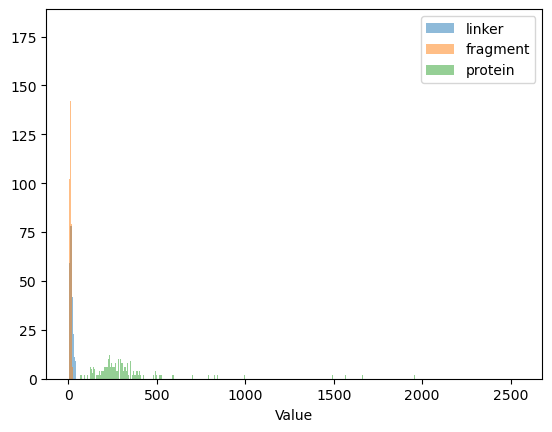

In [5]:
#plot test set number of linker_gen, fragment and protein nodes
linker_gen_nodes, fragment_nodes, protein_nodes = [], [], []
for x in test_dataloader:
    linker_gen_nodes.extend(x['num_linker_gen_nodes'])
    fragment_nodes.extend(x['num_fragment_nodes'])
    protein_nodes.extend(x['num_protein_nodes'])

import matplotlib.pyplot as plt
plt.hist(linker_gen_nodes, bins=range(min(linker_gen_nodes+fragment_nodes+protein_nodes), max(linker_gen_nodes+fragment_nodes+protein_nodes) + 2), alpha=0.5, label='linker')
plt.hist(fragment_nodes, bins=range(min(linker_gen_nodes+fragment_nodes+protein_nodes), max(linker_gen_nodes+fragment_nodes+protein_nodes) + 2), alpha=0.5, label='fragment')
plt.hist(protein_nodes, bins=range(min(linker_gen_nodes+fragment_nodes+protein_nodes), max(linker_gen_nodes+fragment_nodes+protein_nodes) + 2), alpha=0.5, label='protein')
plt.xlabel('Value')
plt.legend(loc='upper right')

# Show the plot
plt.show()

linker


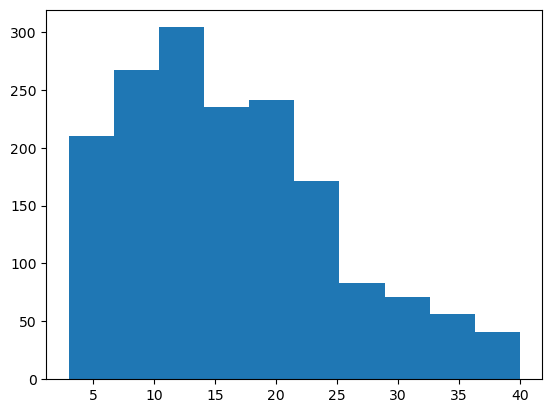

fragment


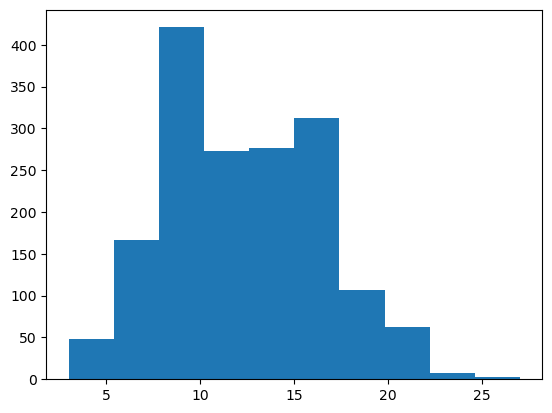

protein


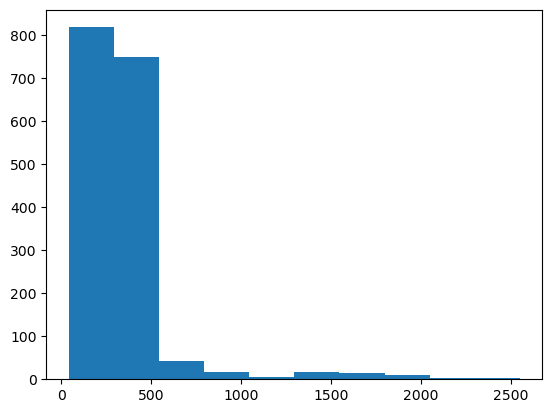

In [7]:
#make 3 different plots
print("linker")
plt.hist(linker_gen_nodes)
plt.show()
print("fragment")
plt.hist(fragment_nodes)
plt.show()
print("protein")
plt.hist(protein_nodes)
plt.show()